## 로지스틱 회귀분석_실습

In [1]:
# 파일명만 적을 수 있도록
import os
from os import chdir
chdir("/home/pirl/test/실습파일")
os.getcwd()

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics

In [2]:
ds_churn = pd.read_csv("통신고객이탈.csv", engine = "python")
ds_churn.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [3]:
ds_churn.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [4]:
ds_churn["CHURN"].replace(to_replace = "Active", value = 0, inplace = True)
ds_churn["CHURN"].replace(to_replace = "Churned", value = 1, inplace = True)

In [5]:
np.random.seed(seed = 1234)
msk = np.random.rand(ds_churn.shape[0],) < 0.7
ds_churn_train = ds_churn[msk]
ds_churn_test = ds_churn[~msk]
# train 데이터와 test 데이터 크기
print("train data size: {}".format(ds_churn_train.shape))
print("test data size:: {}".format(ds_churn_test.shape))

train data size: (635, 15)
test data size:: (295, 15)


In [6]:
ds_churn_train = sm.add_constant(ds_churn_train)
ds_churn_train.head()

,const,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,1.0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,1.0,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,1.0,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
5,1.0,0,K105530,M,51,CAT 100,S80,Med,49.43,3,289,486.6,1,31.8,427,903.3
6,1.0,0,K106210,F,30,CAT 100,ASAD170,Med,32.30,6,427,729.6,12,52.8,490,907.2


## 에러가 뜬 이유는?
## DROPPED_CALLS 데이터의 문제였다고 하심.
## 더미가 많은 문제도 있다.
## fit(method = 'bfgs')로 하면 됨.

In [7]:
# DROPPED_CALLS 데이터를 뺐을 때
# from_formula 함수를 이용하여 변수 역할 지정
log_model = sm.Logit.from_formula("""CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) + SERVICE_DURATION + PEAK_CALLS_NO + WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME + 1""", ds_churn_train)
# 적합
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.256875
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  635
Model:                          Logit   Df Residuals:                      607
Method:                           MLE   Df Model:                           27
Date:                Mon, 11 Feb 2019   Pseudo R-squ.:                  0.4750
Time:                        09:17:38   Log-Likelihood:                -163.12
converged:                      False   LL-Null:                       -310.70
                                        LLR p-value:                 6.654e-47
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -27.5931   1.69e+04     -0.002      0.999   -3.31e+04    3.31e+04
C(GENDER)[T.M]   

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [8]:
# fit(method = 'bfgs')를 넣었을 때
# from_formula 함수를 이용하여 변수 역할 지정
log_model = sm.Logit.from_formula("""CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) + SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME + 1""", ds_churn_train)
# 적합
log_result = log_model.fit(method = 'bfgs')
print(log_result.summary())

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.261573
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 42
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  635
Model:                          Logit   Df Residuals:                      606
Method:                           MLE   Df Model:                           28
Date:                Mon, 11 Feb 2019   Pseudo R-squ.:                  0.4654
Time:                        09:17:38   Log-Likelihood:                -166.10
converged:                      False   LL-Null:                       -310.70
                                        LLR p-value:                 3.382e-45
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.3122      2

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [9]:
# step 4부터 시작

## Decision Tree

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# os: 환경설정 패키지
import os

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree imposet()rt export_graphviz
import graphviz

In [12]:
# 파일명만 적을 수 있도록
from os import chdir
chdir("/home/pirl/test/실습파일")
os.getcwd()
ds_hmeq = pd.read_csv("HMEQ.csv")
ds_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [13]:
ds_hmeq.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [14]:
ds_hmeq["JOB"].fillna("Other",inplace = True)
ds_hmeq.fillna(ds_hmeq.mean(),inplace=True)

In [15]:
ds_hmeq.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [33]:
# get_dummies: 데이터의 문자형 컬럼에 대한 더미변수 생성
ds_hmeq_dummy = pd.get_dummies(ds_hmeq)
# 더미변수 생성된 데이터의 상위 5개 row를 확인
ds_hmeq_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [17]:
np.random.seed(seed = 1234)
# 0.7(70%)보다 작으면 True -> train 데이터, 아니면 False -> test데이터
msk = np.random.rand(ds_hmeq_dummy.shape[0]) < 0.7
ds_hmeq_train = ds_hmeq_dummy[msk]
print(msk)
ds_hmeq_test = ds_hmeq_dummy[~msk]
# train/test 데이터의 목표변수 설명변수 지정
ds_hmeq_train_y = ds_hmeq_train["BAD"]
ds_hmeq_train_x = ds_hmeq_train.drop("BAD", axis = 1, inplace = False)
ds_hmeq_test_y = ds_hmeq_test["BAD"]
ds_hmeq_test_x = ds_hmeq_test.drop("BAD", axis = 1, inplace = False)
# train 데이터와 test 데이터의 크기
print("train data X size: {}".formaBADt(ds_hmeq_train_x.shape))
print("train data Y size: {}".format(ds_hmeq_train_y.shape))
print("test data X size: {}".format(ds_hmeq_test_x.shape))
print("test data Y size: {}".format(ds_hmeq_test_y.shape))

[ True  True  True ...  True  True  True]
train data X size: (2604, 18)
train data Y size: (2604,)
test data X size: (1144, 18)
test data Y size: (1144,)


In [18]:
# 데이터 분할 함수 사용
from sklearn.model_selection import train_test_split
# dummy 변수로부터 변수 역할 지정
ds_hmeq_y = ds_hmeq_dummy["BAD"]
ds_hmeq_x = ds_hmeq_dummy.drop("BAD", axis = 1, inplace = False)
# train_test_split(X:설명변수 데이터, Y:목표변수 데이터, test size = test 데이터 비율, random_state: 랜덤)
ds_hmeq_train_x2,ds_hmeq_test_x2,ds_hmeq_train_y2,ds_hmeq_test_y2 =\
train_test_split(ds_hmeq_x, ds_hmeq_y,test_size=0.30,random_state = 1234)
# train 데이터와 test 데이터의 크기
print("train data X size: {}".format(ds_hmeq_train_x2.shape))
print("train data Y size: {}".format(ds_hmeq_train_y2.shape))
print("test data X size: {}".format(ds_hmeq_test_x2.shape))
print("test data Y size: {}".format(ds_hmeq_test_y2.shape))

train data X size: (2623, 18)
train data Y size: (2623,)
test data X size: (1125, 18)
test data Y size: (1125,)


In [19]:
# 의사결정나무 모델 생성
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(ds_hmeq_train_x, ds_hmeq_train_y)
# 훈련 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(ds_hmeq_train_x, ds_hmeq_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(ds_hmeq_test_x, ds_hmeq_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.927


In [20]:
# 현재 생생된 트리모델의 옵션 확인
tree_uncustomized.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')>

In [21]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# 적용가능한 criterion: gini, entropy
para_criterion = ["gini","entropy"]
# para_criterion별로 트리 모델 생성 및 정확도값 저장
for criterion in para_criterion:
    tree1 = DecisionTreeClassifier(criterion = criterion, random_state=1234)
    tree1.fit(ds_hmeq_train_x,ds_hmeq_train_y)
    train_accuracy.append(tree1.score(ds_hmeq_train_x,ds_hmeq_train_y))
    test_accuracy.append(tree1.score(ds_hmeq_test_x,ds_hmeq_test_y))
# 저장된 모델의 criterion 및 train/test 데이터 분류 정확도 테이블 생성
ds_accuracy1 = pd.DataFrame()
ds_accuracy1["Criterion"] = para_criterion
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy
ds_accuracy1.round(3)

,Criterion,TrainAccuracy,TestAccuracy
0,gini,1.0,0.927
1,entropy,1.0,0.921


In [22]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# parameter 결과 테이블을 위함
para_criterion = []; para_max_depth = []
# 최대 깊이 1~10까지 순차 실행
n_iter_depth = 10
# 적용가능한 criterion: gini, entropy
list_criterion = ["gini","entropy"]
for criterion in list_criterion:
    for depth in range(1, n_iter_depth+1):
        tree2 = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=1234)
        tree2.fit(ds_hmeq_train_x,ds_hmeq_train_y)
        
        train_accuracy.append(tree2.score(ds_hmeq_train_x,ds_hmeq_train_y))
        test_accuracy.append(tree2.score(ds_hmeq_test_x,ds_hmeq_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(depth)

In [23]:
ds_accuracy2 = pd.DataFrame()
ds_accuracy2["Criterion"] = para_criterion
ds_accuracy2["Depth"] = para_max_depth
ds_accuracy2["TrainAccuracy"] = train_accuracy
ds_accuracy2["TestAccuracy"] = test_accuracy
ds_accuracy2.round(3)

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.924,0.927
1,gini,2,0.930,0.932
2,gini,3,0.931,0.932
3,gini,4,0.934,0.934
4,gini,5,0.937,0.934
5,gini,6,0.938,0.937
6,gini,7,0.944,0.934
7,gini,8,0.952,0.935
8,gini,9,0.959,0.936
9,gini,10,0.965,0.943


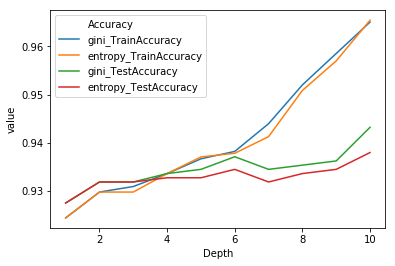

In [24]:
ds_accuracy2_melt = pd.melt(ds_accuracy2,id_vars=["Criterion","Depth"])
ds_accuracy2_melt["Accuracy"] = ds_accuracy2_melt["Criterion"]+"_"+ds_accuracy2_melt["variable"]
sns.lineplot(x = "Depth", y = "value", hue = "Accuracy", data= ds_accuracy2_melt);

In [25]:
train_accuracy = []; test_accuracy = []
para_criterion = []; para_max_depth = []; para_min_leaf_size = []
max_depth = 10
list_min_leaf_size = [i*10 for i in range(1,6)]
for criterion in list_criterion:
    for leafsize in list_min_leaf_size:
        tree3 = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_leaf = leafsize, random_state=1234)
        tree3.fit(ds_hmeq_train_x,ds_hmeq_train_y)
        train_accuracy.append(tree3.score(ds_hmeq_train_x,ds_hmeq_train_y))
        test_accuracy.append(tree3.score(ds_hmeq_test_x,ds_hmeq_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(max_depth)
        para_min_leaf_size.append(leafsize)

In [26]:
ds_accuracy3 = pd.DataFrame()
ds_accuracy3["Criterion"] = para_criterion
ds_accuracy3["Depth"] = para_max_depth
ds_accuracy3["MinLeafSize"] = para_min_leaf_size
ds_accuracy3["TrainAccuracy"] = train_accuracy
ds_accuracy3["TestAccuracy"] = test_accuracy
ds_accuracy3.round(3)

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,10,10,0.945,0.935
1,gini,10,20,0.931,0.924
2,gini,10,30,0.929,0.929
3,gini,10,40,0.926,0.924
4,gini,10,50,0.924,0.930
5,entropy,10,10,0.944,0.930
6,entropy,10,20,0.930,0.925
7,entropy,10,30,0.927,0.933
8,entropy,10,40,0.924,0.927
9,entropy,10,50,0.924,0.930


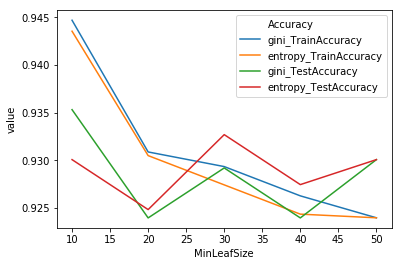

In [27]:
ds_accuracy3_melt = pd.melt(ds_accuracy3,id_vars=["Criterion","Depth","MinLeafSize"])
ds_accuracy3_melt["Accuracy"] = ds_accuracy3_melt["Criterion"]+"_"+ds_accuracy3_melt["variable"]
sns.lineplot(x = "MinLeafSize", y = "value", hue = "Accuracy", data= ds_accuracy3_melt);

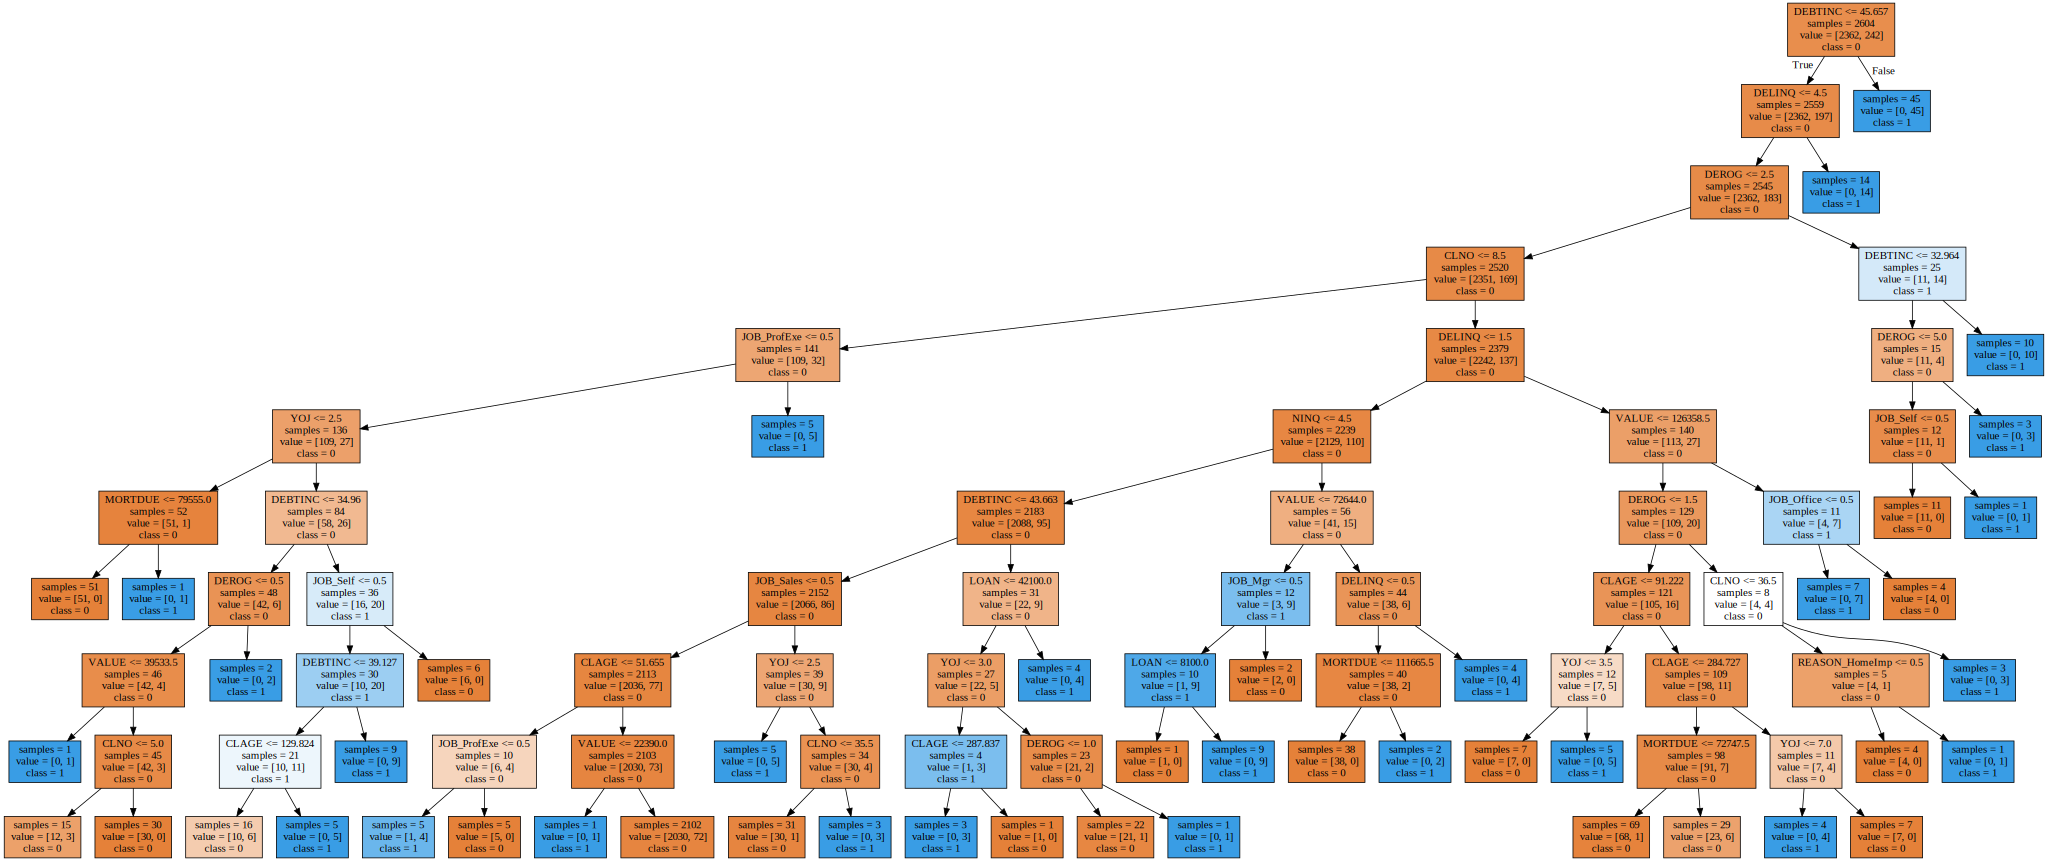

In [28]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth=10, random_state=1234)
tree.fit(ds_hmeq_train_x,ds_hmeq_train_y)

export_graphviz(tree, out_file="tree.dot",class_names=["0","1"],\
               feature_names = ds_hmeq_train_x.columns, impurity=False,filled=True)
os.environ["PATH"]+=os.pathsep + "/usr/local/bin/dot"

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))